In [1]:
import pandas as pd

In [16]:
loans = pd.read_csv('loanstats.csv')

## Lending Club's Clusters

In [107]:
loans2.groupby('sub_grade')['int_rate'].mean()

sub_grade
A1     5.467657
A2     6.635003
A3     7.152230
A4     7.486479
A5     8.153930
B1     8.781556
B2     9.858439
B3    10.661784
B4    11.388414
B5    11.883721
C1    12.678399
C2    13.376468
C3    13.963599
C4    14.679894
C5    15.567373
D1    16.371462
D2    17.311381
D3    18.037539
D4    18.623800
D5    19.418462
E1    19.968617
E2    20.592303
E3    21.307258
E4    22.212919
E5    23.388326
F1    24.045416
F2    24.837811
F3    25.666829
F4    26.304614
F5    26.986150
G1    27.588903
G2    27.892877
G3    28.346276
G4    28.998167
G5    29.294348
Name: int_rate, dtype: float64

## Remove the columns that reflect Lending Club's actual clusters

We are effectively predicting the grade and sub_grade columns, the clusters Lending Club uses to assign interest rates.

In [33]:
#loans.drop('grade', axis=1, inplace=True)
#loans.drop('sub_grade', axis=1, inplace=True)
#loans.drop('emp_title', axis=1, inplace=True)
#loans.drop('set', axis=1, inplace=True)
#loans.drop('timestamp', axis=1, inplace=True)
#loans.drop('issue_d', axis=1, inplace=True)
#loans.drop('last_credit_pull_d', axis=1, inplace=True)
#loans.drop('title', axis=1, inplace=True)
#loans.drop('purpose', axis=1, inplace=True)
#loans.drop('next_pymnt_d', axis=1, inplace=True)
#loans.drop('zip_code', axis=1, inplace=True)

In [19]:
loans['term'] = loans['term'].map(lambda a: int(a.strip(' months')))
loans['application_type'] = loans['application_type'].map(lambda a: 1 if a=='Joint App' else 0)

def elength(a):
    if (a=='n/a'):
        return 0
    elif (a=='10+ years'):
        return 10
    elif (a=='1 year'):
        return 1
    elif (a=='< 1 year'):
        return 0.5
    else:
        return float(a.strip(' years'))
    
loans['emp_length'] = loans['emp_length'].map(lambda a: elength(a))

loans['revol_util'] = loans['revol_util'].map(lambda a: float(a.strip('%')))

homes = pd.get_dummies(loans['home_ownership'], prefix='home')
loans = loans.join(homes)
loans.drop('home_ownership', axis=1, inplace=True)

states = pd.get_dummies(loans['addr_state'], prefix='st')
loans = loans.join(states)
loans.drop('addr_state', axis=1, inplace=True)

## K Means

In [138]:
from sklearn import cluster

k_means=cluster.KMeans(n_clusters=7)

In [137]:
loans_y = loans['int_rate']
loans_x = loans.drop('int_rate', axis=1)

In [139]:
k_means.fit(loans_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [140]:
labels7 = k_means.labels_

In [218]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [227]:
import pickle
from sklearn.externals import joblib

#pickle.dump(k_means, open('kmeans.pkl', 'wb'))
with open('/Users/emily-air13/Desktop/code/INFO-7390-ADS-Fall-17-TeamNo.4/Assignment 2/kmeans.pkl', 'wb') as f:
    joblib.dump(k_means, f)

In [51]:
loans2 = pd.read_csv('loanstats.csv')

In [141]:
loans2['kcluster7'] = labels7

In [54]:
loans2['kcluster'].value_counts()

5    279997
0    236427
2    234444
1    233274
3    224779
6    186942
4    117020
Name: kcluster, dtype: int64

In [55]:
loans2['grade'].value_counts()

C    455309
B    445905
A    249686
D    216608
E    101833
F     33678
G      9864
Name: grade, dtype: int64

In [142]:
pd.crosstab(loans2.grade,loans2.kcluster7)

kcluster7,0,1,2,3,4,5,6
grade,,,,,,,
A,39216,18550,36148,33507,40753,47920,33592
B,65124,29498,87655,49508,69577,70143,74400
C,64421,32382,94882,52905,80493,63997,66229
D,31895,21794,39810,29293,27128,28940,37748
E,18092,10581,14767,16070,10653,15292,16378
F,5028,3257,5273,4567,3380,5497,6676
G,1003,958,1462,1092,2460,1485,1404


A: 1
B: 5
C: 5
D: 5
E: 3
F: 0
G: 2

In [60]:
k_means35=cluster.KMeans(n_clusters=35)
k_means35.fit(loans_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=35, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
loans2['kcluster35'] = k_means35.labels_

In [62]:
pd.crosstab(loans2.sub_grade,loans2.kcluster35)

kcluster35,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
sub_grade,,,,,,,,,,,,,,,,,,,,,
A1,1468,1551,1624,818,2201,1742,603,605,657,1085,...,968,1139,4613,1187,2244,1182,789,832,559,1109
A2,1150,1150,1401,908,1739,1238,976,637,950,913,...,1171,888,1719,851,1795,1139,762,505,615,702
A3,1481,1155,1195,871,1529,1060,965,639,1379,926,...,1119,746,1627,823,1534,1047,657,516,651,663
A4,2203,1297,1682,1122,1563,1216,1544,1209,2088,1171,...,1744,3102,1799,1193,1533,1200,742,888,923,748
A5,3001,1707,2570,1082,2639,1929,2196,1442,2379,1573,...,2442,1582,2311,1684,2769,2143,1165,1031,1190,1001
B1,2764,3704,2854,1110,3152,2309,1722,1430,2503,2598,...,1854,1887,2667,1822,3314,2453,2127,1073,891,1701
B2,4549,2575,2628,1124,2988,2557,1801,1599,2781,2963,...,1917,1909,2866,1938,3228,2198,2041,1085,1049,1215
B3,5365,2716,2746,1312,3274,2692,2057,1826,3132,3273,...,2284,2288,3325,2083,3500,2398,2097,1217,1144,1258
B4,5032,3384,2622,1326,2894,2665,2183,1976,3009,4064,...,2514,2310,3267,2053,2988,2335,2732,1143,1242,1426


In [134]:
application = ['fico_range_low','dti','loan_amnt','term']
k_means7=cluster.KMeans(n_clusters=7)
k_means7.fit(loans_x[application])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [135]:
loans2['kclusters7'] = k_means7.labels_

In [136]:
pd.crosstab(loans2.grade,loans2.kclusters7)

kclusters7,0,1,2,3,4,5,6
grade,,,,,,,
A,24493,56305,72193,8119,41288,32605,14683
B,32320,115571,131148,17734,71390,55882,21860
C,39358,103171,119328,27296,77072,60525,28559
D,21168,42957,50774,16361,38278,30308,16762
E,12298,13200,20062,10530,18666,16870,10207
F,4379,3295,5666,3828,6346,5951,4213
G,1292,549,1608,1357,1889,1767,1402


a: 5
b: 

In [84]:
pd.options.display.max_columns = 101

loans.head()

,id,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,tot_cur_bal,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_HI,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_MT,st_NC,st_ND,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY
0,10149342,27050.0,36,10.99,885.46,10.0,55000.0,22.87,0.0,730.0,734.0,195.0,14.0,36638.0,61.2,27.0,779.0,775.0,0.0,1.0,0,114834.0,53.9,0.0,117.0,6.0,4.0,16.0,8.0,0.0,2.0,4.0,8.0,8.0,15.0,4.0,14.0,0.0,0.0,1.0,25.0,0.0,0.0,35700.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10149488,4800.0,36,10.99,157.13,2.0,39600.0,2.49,0.0,755.0,759.0,195.0,3.0,4136.0,16.1,8.0,534.0,530.0,0.0,1.0,0,4136.0,16.1,0.0,104.0,25.0,0.0,25.0,3.0,0.0,2.0,2.0,4.0,1.0,7.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,10119623,12000.0,36,11.99,398.52,10.0,130000.0,13.03,0.0,715.0,719.0,195.0,9.0,10805.0,67.0,19.0,724.0,720.0,0.0,1.0,0,327264.0,93.0,0.0,173.0,4.0,3.0,85.0,4.0,0.0,3.0,5.0,4.0,8.0,8.0,5.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,10700.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10129506,20800.0,36,13.53,706.16,10.0,81500.0,16.73,0.0,685.0,689.0,64.0,29.0,23473.0,54.5,41.0,629.0,625.0,0.0,1.0,0,23473.0,54.6,0.0,115.0,0.0,0.0,0.0,0.0,1.0,8.0,24.0,17.0,1.0,40.0,24.0,29.0,0.0,0.0,3.0,50.0,0.0,0.0,15000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10159611,10000.0,36,9.67,321.13,7.0,102000.0,15.55,2.0,670.0,674.0,11.0,9.0,9912.0,44.4,22.0,629.0,625.0,0.0,1.0,0,39143.0,89.4,0.0,243.0,8.0,0.0,25.0,8.0,1.0,3.0,4.0,6.0,9.0,13.0,4.0,9.0,0.0,0.0,1.0,66.7,0.0,0.0,9200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
loans.drop('last_fico_range_high', axis=1, inplace=True)
loans.drop('last_fico_range_low', axis=1, inplace=True)

## Markers of "Grade"

In [99]:
loans2.groupby('grade')['fico_range_low'].mean()

grade
A    725.405109
B    696.232146
C    687.826081
D    682.973574
E    681.788566
F    680.052705
G    678.423560
Name: fico_range_low, dtype: float64

In [100]:
loans2.groupby('grade')['dti'].mean()

grade
A    16.191519
B    17.998157
C    19.606962
D    20.958661
E    21.656552
F    21.824150
G    22.492440
Name: dti, dtype: float64

In [164]:
loans2.groupby('grade')['fico_range_low'].mean()

grade
A    725.405109
B    696.232146
C    687.826081
D    682.973574
E    681.788566
F    680.052705
G    678.423560
Name: fico_range_low, dtype: float64

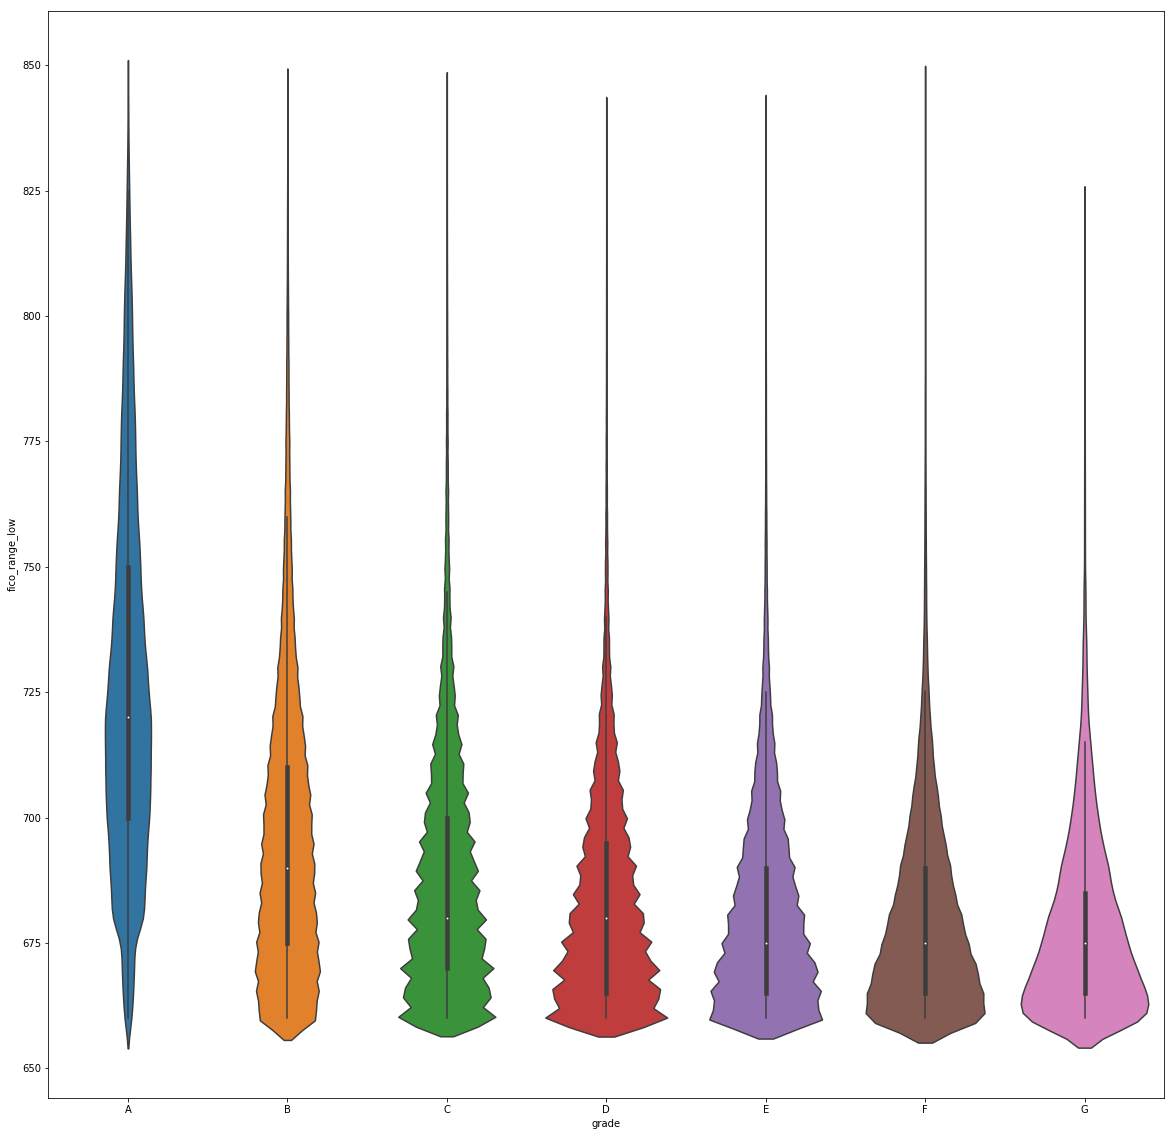

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.close('all')
plt.figure(figsize=(20,20))

sns.violinplot(x="grade", y="fico_range_low", data=loans2, order=['A','B','C','D','E','F','G'])

plt.show()

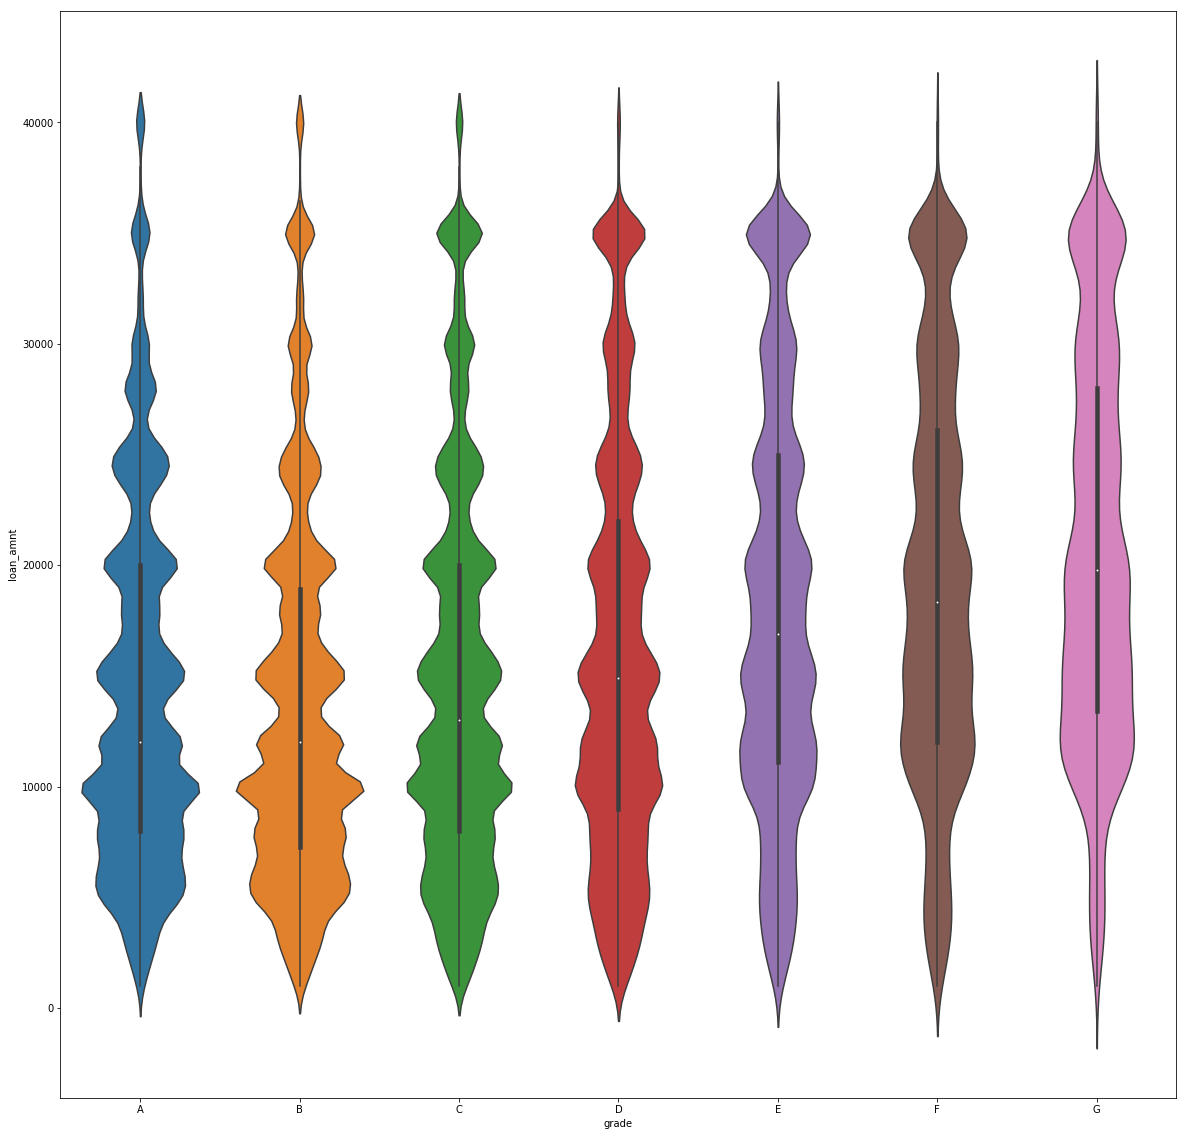

In [168]:
plt.close('all')
plt.figure(figsize=(20,20))

sns.violinplot(x="grade", y="loan_amnt", data=loans2, order=['A','B','C','D','E','F','G'])

plt.show()

In [129]:
loans2.groupby('grade')['term'].value_counts()

grade  term      
A       36 months    239658
        60 months     10028
B       36 months    373906
        60 months     71999
C       36 months    295762
        60 months    159547
D       36 months    123440
        60 months     93168
E       60 months     66901
        36 months     34932
F       60 months     26748
        36 months      6930
G       60 months      8338
        36 months      1526
Name: term, dtype: int64

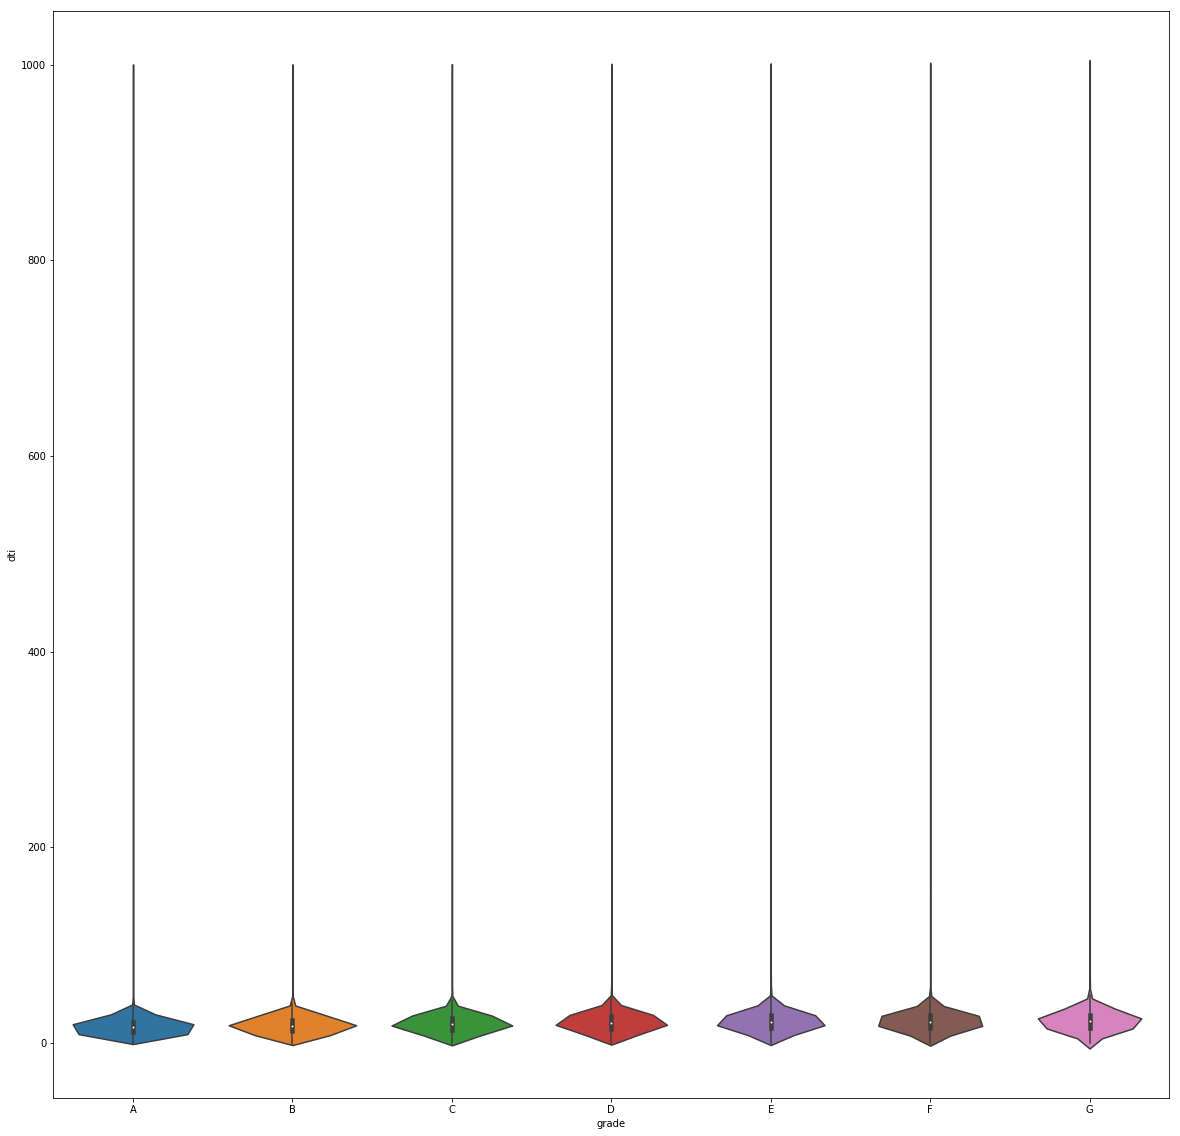

In [169]:
plt.close('all')
plt.figure(figsize=(20,20))

sns.violinplot(x="grade", y="dti", data=loans2, order=['A','B','C','D','E','F','G'])

plt.show()

In [149]:
loans2.groupby('grade')['loan_amnt'].median()

grade
A    12000.0
B    12000.0
C    13000.0
D    14925.0
E    16900.0
F    18350.0
G    19800.0
Name: loan_amnt, dtype: float64

## Group by Credit Score

In [208]:
def manual_clusters(fico, dti, amnt, term):
    if fico > 700 and dti < 30 and amnt < 20000:
        return 'Group1'
    elif (fico > 780 and dti < 30 and amnt < 20000 and term==' 36 months') or (fico > 700 and term==' 60 months'):
        return 'Group2'
    elif dti < 30 and amnt < 20000 and term==' 36 months': 
        return 'Group3'
    elif dti < 30 and term==' 36 months': # amnt < 25000 
        return 'Group4'
    elif fico > 670 and dti < 30 and amnt < 30000:
        return 'Group5'
    elif dti < 30:
        return 'Group6'
    else:
        return 'Group7'

loans2['manual_cat'] = loans2.apply(lambda x: manual_clusters(x['fico_range_low'], x['dti'], x['loan_amnt'], x['term']), axis=1)

In [209]:
pd.crosstab(loans2.grade, loans2.manual_cat)

manual_cat,Group1,Group2,Group3,Group4,Group5,Group6
grade,,,,,,
A,117173,59007,26135,22643,14908,9820
B,72469,83718,56164,61101,67496,104957
C,38872,66303,53631,67209,82843,146451
D,11193,24129,22494,31345,42095,85352
E,4342,10076,10259,15132,20504,41520
F,1208,2829,3077,4715,6889,14960
G,290,702,801,1329,2049,4693


## Attempt at Reproducing "Grades"

In [ ]:
def manual_clusters(fico):
    if fico > 720:
        return 'Group1'
    elif fico > 700:
        return 'Group2'
    elif fico > 690: 
        return 'Group3'
    elif fico > 680: # amnt < 25000 
        return 'Group4'
    elif fico > 670:
        return 'Group5'
    else:
        return 'Group6'

loans2['manual_cat'] = loans2.apply(lambda x: manual_clusters(x['fico_range_low']), axis=1)